In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

%matplotlib inline

import pickle

In [2]:
import statsmodels
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df = df[df['condition']!= 'Poor']

In [161]:
df['year'] = df['date'].map(lambda x: x[-4:])

<ipython-input-161-1d260887d00d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].map(lambda x: x[-4:])


In [162]:
set(df['year'])

{'2014', '2015'}

In [163]:
df['month'] = df['date'].map(lambda x: x[0:2])
df['month'] = df['month'].map(lambda x: x.replace('/',''))

<ipython-input-163-e7a45c5050ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].map(lambda x: x[0:2])
<ipython-input-163-e7a45c5050ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].map(lambda x: x.replace('/',''))


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21567 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21567 non-null  int64  
 1   date               21567 non-null  object 
 2   price              21567 non-null  float64
 3   bedrooms           21567 non-null  int64  
 4   bathrooms          21567 non-null  float64
 5   sqft_living        21567 non-null  int64  
 6   sqft_lot           21567 non-null  int64  
 7   floors             21567 non-null  float64
 8   waterfront         19195 non-null  object 
 9   view               21504 non-null  object 
 10  condition          21567 non-null  object 
 11  grade              21567 non-null  object 
 12  sqft_above         21567 non-null  int64  
 13  sqft_basement      21567 non-null  object 
 14  yr_built           21567 non-null  int64  
 15  yr_renovated       21567 non-null  int64  
 16  zipcode            215

In [165]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)


<ipython-input-165-be43472449df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype(int)
<ipython-input-165-be43472449df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [166]:
df['grade_value'] = df['grade'].map(lambda x: x[:2])
df['grade_value'] = df['grade_value'].astype(int)

<ipython-input-166-5971d14f8097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_value'] = df['grade'].map(lambda x: x[:2])
<ipython-input-166-5971d14f8097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade_value'] = df['grade_value'].astype(int)


In [167]:
set(df['grade_value'])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [168]:
condition_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
df['condition_num'] = df['condition'].map(condition_dict)

<ipython-input-168-1a3e43b014fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition_num'] = df['condition'].map(condition_dict)


In [169]:
df['age'].head(40)

0      60
1      24
2      82
3      50
4      28
5      14
6      20
7      52
8      55
9      12
10     50
11     73
12     88
13     38
14    115
15     36
16     21
17     99
18     94
19     46
20     68
21     47
22     20
23     30
24     30
25     74
26    100
27    106
28     67
29     10
30     12
31     10
32     86
33     86
34     34
35     13
37    111
38     46
39     19
40     15
Name: age, dtype: int64

In [170]:
df['bedrooms'].value_counts().sum()

21567

<AxesSubplot:>

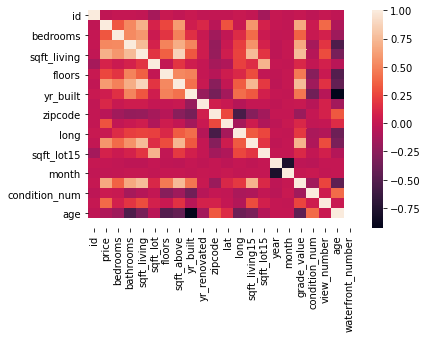

In [171]:
sns.heatmap(df.corr())

In [172]:
df['view'].value_counts()

NONE         19395
AVERAGE        957
GOOD           508
FAIR           329
EXCELLENT      315
Name: view, dtype: int64

In [173]:
view_dict = {'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
df['view_number'] = df['view'].map(view_dict)

<ipython-input-173-6b391e9480ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_number'] = df['view'].map(view_dict)


In [174]:
df['view_number'].value_counts()

0.0    19395
2.0      957
3.0      508
1.0      329
4.0      315
Name: view_number, dtype: int64

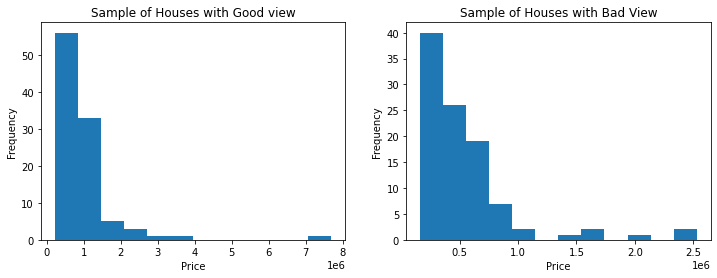

In [175]:
good_view = df.loc[df['view_number'] > 1].sample(n=100, random_state=42)
bad_view = df.loc[df['view_number'] <= 1].sample(n=100, random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Houses with Good view')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.hist(good_view['price'], bins=12)

ax2.set_title('Sample of Houses with Bad View')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.hist(bad_view['price'], bins=12)
plt.show()

In [176]:
alpha_level = 0.05
count_of_samples = good_view['price'].count() + bad_view['price'].count()
one_tailed_rejection_threshold = stats.t.ppf(1-alpha_level, df=count_of_samples-2)
print('We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of', one_tailed_rejection_threshold)

We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of 1.6525857836172075


In [177]:
if stats.ttest_ind(good_view['price'], bad_view['price']).statistic > one_tailed_rejection_threshold:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null')

Reject the Null Hypothesis


In [178]:
df['waterfront'].value_counts()

NO     19050
YES      145
Name: waterfront, dtype: int64

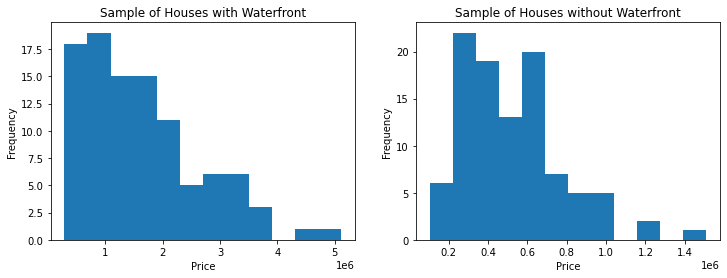

In [179]:
# Run this cell without changes to set up for the next set of questions


# Separating based on light cars and heavy cars
waterfront = df.loc[df['waterfront'] == 'YES'].sample(n=100, random_state=42)
no_waterfront = df.loc[df['waterfront'] == 'NO'].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Houses with Waterfront')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.hist(waterfront['price'], bins=12)

ax2.set_title('Sample of Houses without Waterfront')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.hist(no_waterfront['price'], bins=12)
plt.show()

In [180]:
alpha_level = 0.05
count_of_samples = waterfront['price'].count() + no_waterfront['price'].count()
one_tailed_rejection_threshold = stats.t.ppf(1-alpha_level, df=count_of_samples-2)
print('We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of', one_tailed_rejection_threshold)


We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of 1.6525857836172075


In [181]:
if stats.ttest_ind(waterfront['price'], no_waterfront['price']).statistic > one_tailed_rejection_threshold:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null')

Reject the Null Hypothesis


In [182]:
df['yr_renovated'].value_counts()

0       20824
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [183]:
df['zipcode'].value_counts()

98103    600
98038    589
98115    583
98052    573
98117    552
        ... 
98102    104
98010    100
98024     80
98148     55
98039     50
Name: zipcode, Length: 70, dtype: int64

In [184]:
top_10_zipcodes = df['zipcode'].value_counts().index[:10]

In [185]:
df_top_10 = df[df['zipcode'].isin(top_10_zipcodes)]

In [186]:
df_top_10

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,month,grade_value,condition_num,view_number,age,waterfront_number
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,-122.031,2390,7570,2015,3,7,2,0.0,12,0.0
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,-122.292,1330,6000,2014,5,7,3,0.0,73,0.0
17,6865200140,5/29/2014,485000.0,4,1.00,1600,4300,1.5,NO,NONE,...,-122.343,1610,4300,2014,5,7,3,0.0,99,0.0
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,NO,NONE,...,-122.304,1520,6235,2014,6,7,2,0.0,67,0.0
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,NO,NONE,...,-122.110,2630,6026,2015,3,8,2,0.0,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,7570050450,9/10/2014,347500.0,3,2.50,2540,4760,2.0,NO,NONE,...,-122.022,2540,4571,2014,9,8,2,0.0,5,0.0
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,NO,NONE,...,-122.346,1180,1224,2015,4,8,2,0.0,7,0.0
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,NONE,...,-122.107,2530,5988,2014,10,8,2,0.0,7,NaN
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,NO,NONE,...,-122.346,1530,1282,2014,10,8,2,0.0,9,0.0


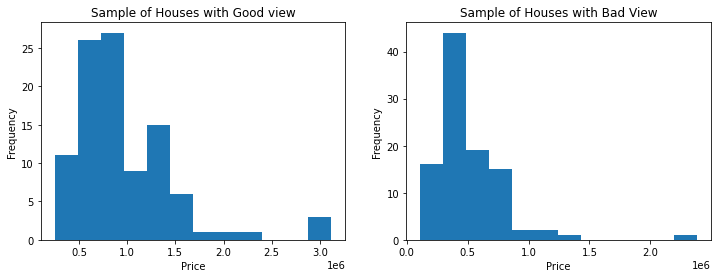

In [187]:
good_view = df_top_10.loc[df['view_number'] > 1].sample(n=100, random_state=42)
bad_view = df_top_10.loc[df['view_number'] <= 1].sample(n=100, random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Houses with Good view')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.hist(good_view['price'], bins=12)

ax2.set_title('Sample of Houses with Bad View')
ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.hist(bad_view['price'], bins=12)
plt.show()

In [188]:
alpha_level = 0.05
count_of_samples = waterfront['price'].count() + no_waterfront['price'].count()
one_tailed_rejection_threshold = stats.t.ppf(1-alpha_level, df=count_of_samples-2)
print('We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of', one_tailed_rejection_threshold)


We will reject the null if we find the t-statistic is greater than our one tailed rejection threshold of 1.6525857836172075


In [189]:
if stats.ttest_ind(good_view['price'], bad_view['price']).statistic > one_tailed_rejection_threshold:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null')

Reject the Null Hypothesis


In [190]:
df_top_10.groupby('bedrooms').mean().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='bedrooms')

In [191]:
bedroom_average_prices = np.array(df_top_10.groupby('bedrooms')['price'].mean())
bedroom_average_prices_index = np.array(df_top_10.groupby('bedrooms')['price'].mean().index)

In [192]:
bedroom_average_prices_m = bedroom_average_prices/1000000

<BarContainer object of 10 artists>

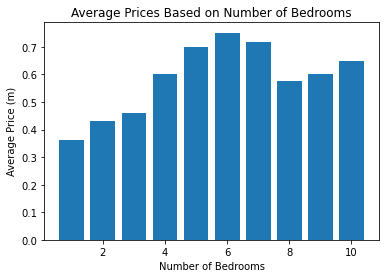

In [193]:
fig, ax = plt.subplots()

ax.set_title('Average Prices Based on Number of Bedrooms')
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Average Price (m)')
ax.bar(bedroom_average_prices_index, bedroom_average_prices_m)


In [194]:
df_top_10.groupby('zipcode')['bedrooms'].mean()

zipcode
98006    3.842742
98023    3.427711
98034    3.467890
98038    3.441426
98042    3.404022
98052    3.616056
98103    3.010000
98115    3.204117
98117    3.019928
98118    3.132411
Name: bedrooms, dtype: float64

In [195]:
df_top_10.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,month,grade_value,condition_num,view_number,age,waterfront_number
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,-122.031,2390,7570,2015,3,7,2,0.0,12,0.0
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,NO,NONE,...,-122.292,1330,6000,2014,5,7,3,0.0,73,0.0
17,6865200140,5/29/2014,485000.0,4,1.00,1600,4300,1.5,NO,NONE,...,-122.343,1610,4300,2014,5,7,3,0.0,99,0.0
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,NO,NONE,...,-122.304,1520,6235,2014,6,7,2,0.0,67,0.0
29,1873100390,3/2/2015,719000.0,4,2.50,2570,7173,2.0,NO,NONE,...,-122.110,2630,6026,2015,3,8,2,0.0,10,0.0


In [196]:
df['yr_renovated'] = df['yr_renovated'].map(lambda x: x if (x>0) else 0)

<ipython-input-196-71d99443d7f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_renovated'] = df['yr_renovated'].map(lambda x: x if (x>0) else 0)


In [197]:
df['yr_renovated'].value_counts()

0       20824
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [198]:
df['yr_renovated'] = df['yr_renovated'].astype(int)

<ipython-input-198-32093f5cb06c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_renovated'] = df['yr_renovated'].astype(int)


In [199]:
df['age'] = df['yr_built']
df.loc[df['yr_renovated'] != 0, 'age'] = df['yr_renovated']
df['age'] = df['age'].map(lambda x: 2015-x)

<ipython-input-199-b4f0c930ce91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['yr_built']
/Users/ferityikar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-199-b4f0c930ce91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [200]:
df[['yr_renovated','yr_built','age']].head(20)

,yr_renovated,yr_built,age
0,0,1955,60
1,1991,1951,24
2,0,1933,82
3,0,1965,50
4,0,1987,28
5,0,2001,14
6,0,1995,20
7,0,1963,52
8,0,1960,55
9,0,2003,12


In [201]:
yesno = {'YEs':1, 'NO':0}
df['waterfront_number'] = df['waterfront'].map(yesno)

<ipython-input-201-be855ce270e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waterfront_number'] = df['waterfront'].map(yesno)


In [202]:
f = 'price ~ bedrooms + view_number + sqft_living + sqft_lot + grade_value + age'
model = ols(formula = f, data = df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     5843.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:27:01   Log-Likelihood:            -2.9559e+05
No. Observations:               21504   AIC:                         5.912e+05
Df Residuals:                   21497   BIC:                         5.913e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.183e+05    1.6e+04    -51.175      0.000    -8.5e+05   -7.87e+05
bedrooms    -3.899e+04   2165.867    -18.003      0.000   -4.32e+04   -3.47e+04
view_number  7.715e+04   2141.609     36.022      0.000    7.29e+04    8.13e+04
sqft_living   198.4019      3.128     63.431      0.000     192.271     204.533
sqft_lot       -0.3417      0.038     -9.002      0.000      -0.416      -0.267
grade_value  1.231e+05   2190.297     56.182      0.000    1.19e+05    1.27e+05
age          2900.1122     60.731     47.753      0.000    2781.075    3019.150
==============================================================================
Omnibus:                    16416.926   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1137851.149
Skew:                           3.100   Prob(JB):                         0.00
Kurtosis:                      38.092   Cond. No.                     4.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
df['view_number'] = df['view_number'].map(lambda x: 0 if np.isnan(x) else x)

<ipython-input-203-4eab79d900ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_number'] = df['view_number'].map(lambda x: 0 if np.isnan(x) else x)


In [204]:
df['bedrooms'].value_counts().sum()

21567

In [205]:
df['view_number'].value_counts().sum()

21567

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21567 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21567 non-null  int64  
 1   date               21567 non-null  object 
 2   price              21567 non-null  float64
 3   bedrooms           21567 non-null  int64  
 4   bathrooms          21567 non-null  float64
 5   sqft_living        21567 non-null  int64  
 6   sqft_lot           21567 non-null  int64  
 7   floors             21567 non-null  float64
 8   waterfront         19195 non-null  object 
 9   view               21504 non-null  object 
 10  condition          21567 non-null  object 
 11  grade              21567 non-null  object 
 12  sqft_above         21567 non-null  int64  
 13  sqft_basement      21567 non-null  object 
 14  yr_built           21567 non-null  int64  
 15  yr_renovated       21567 non-null  int64  
 16  zipcode            215

In [207]:
y = df['price']
x = df[['sqft_living','sqft_lot','grade_value','bedrooms','bathrooms','floors','sqft_living15','sqft_lot15','condition_num']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3071.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:27:02   Log-Likelihood:            -2.9807e+05
No. Observations:               21567   AIC:                         5.962e+05
Df Residuals:                   21557   BIC:                         5.962e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.556e+05   1.71e+04    -38.352      0.000   -6.89e+05   -6.22e+05
sqft_living     220.4284      3.978     55.413      0.000     212.631     228.225
sqft_lot          0.0151      0.058      0.262      0.794      -0.098       0.128
grade_value    1.028e+05   2500.767     41.124      0.000    9.79e+04    1.08e+05
bedrooms      -5.055e+04   2371.922    -21.313      0.000   -5.52e+04   -4.59e+04
bathrooms     -1.058e+04   3661.990     -2.888      0.004   -1.78e+04   -3398.171
floors        -2.193e+04   3777.660     -5.805      0.000   -2.93e+04   -1.45e+04
sqft_living15    14.6901      3.950      3.719      0.000       6.947      22.433
sqft_lot15       -0.7905      0.088     -8.969      0.000      -0.963      -0.618
condition_num  6.463e+04   2687.472     24.050      0.000    5.94e+04    6.99e+04
==============================================================================
Omnibus:                    16533.460   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           953953.014
Skew:                           3.187   Prob(JB):                         0.00
Kurtosis:                      34.952   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
y = df['price']
x = df[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     4649.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:27:02   Log-Likelihood:            -2.9705e+05
No. Observations:               21567   AIC:                         5.941e+05
Df Residuals:                   21559   BIC:                         5.942e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -9.8e+05   1.74e+04    -56.167      0.000   -1.01e+06   -9.46e+05
sqft_living     193.0720      3.463     55.749      0.000     186.284     199.860
grade_value    1.258e+05   2287.036     55.017      0.000    1.21e+05     1.3e+05
bedrooms      -5.279e+04   2253.087    -23.430      0.000   -5.72e+04   -4.84e+04
bathrooms      5.044e+04   3703.510     13.621      0.000    4.32e+04    5.77e+04
floors         1.637e+04   3665.015      4.468      0.000    9190.998    2.36e+04
condition_num  2.126e+04   2713.381      7.837      0.000    1.59e+04    2.66e+04
age            3578.9523     74.219     48.222      0.000    3433.478    3724.427
==============================================================================
Omnibus:                    17335.240   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1220668.898
Skew:                           3.368   Prob(JB):                         0.00
Kurtosis:                      39.235   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
df_top_10['age']

9        12
11       73
17       99
28       67
29       10
         ..
21573     5
21576     7
21578     7
21579     9
21592     6
Name: age, Length: 5489, dtype: int64

In [210]:
df_top_10['zipcode'].value_counts()

98103    600
98038    589
98115    583
98052    573
98117    552
98042    547
98034    545
98118    506
98023    498
98006    496
Name: zipcode, dtype: int64

In [211]:

zipcode = 98117
f = 'price ~ bedrooms + view_number + sqft_living + sqft_lot + age '
model = ols(formula = f, data = df[df['zipcode']==zipcode])
zip_model = model.fit().summary()
zip_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     218.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.02e-127
Time:                        10:27:02   Log-Likelihood:                -7182.1
No. Observations:                 552   AIC:                         1.438e+04
Df Residuals:                     546   BIC:                         1.440e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.018e+05   2.01e+04     10.033      0.000    1.62e+05    2.41e+05
bedrooms     1.285e+04   6615.235      1.943      0.053    -141.083    2.58e+04
view_number  5.213e+04   7585.261      6.873      0.000    3.72e+04     6.7e+04
sqft_living   175.6908     10.600     16.574      0.000     154.868     196.513
sqft_lot        7.6988      2.394      3.216      0.001       2.996      12.402
age           -88.3215    151.701     -0.582      0.561    -386.311     209.668
==============================================================================
Omnibus:                       50.201   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.855
Skew:                           0.601   Prob(JB):                     3.75e-19
Kurtosis:                       4.498   Cond. No.                     2.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
zipcode = 98118
df_top_10_zip = df_top_10[df_top_10['zipcode']==zipcode]
y = df_top_10_zip['price']
x = df_top_10_zip[['bedrooms', 'view_number', 'sqft_living','sqft_lot','age','grade_value']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

MissingDataError: exog contains inf or nans

In [213]:
model.rsquared

AttributeError: 'OLS' object has no attribute 'rsquared'

In [214]:
df_top_10.groupby(['bedrooms','grade'])['id'].count()

bedrooms  grade        
1         5 Fair              9
          6 Low Average      24
          7 Average          12
          8 Good              2
2         10 Very Good        5
          4 Low               2
          5 Fair             13
          6 Low Average     182
          7 Average         377
          8 Good            108
          9 Better           11
3         10 Very Good       83
          11 Excellent       14
          12 Luxury           2
          5 Fair              8
          6 Low Average     192
          7 Average        1383
          8 Good            705
          9 Better          193
4         10 Very Good       97
          11 Excellent       44
          12 Luxury          17
          13 Mansion          1
          5 Fair              1
          6 Low Average      37
          7 Average         606
          8 Good            608
          9 Better          300
5         10 Very Good       32
          11 Excellent       12
          12 Lux

In [215]:
df_top_10[df_top_10['bedrooms']>8]['zipcode']

4092     98103
15147    98006
Name: zipcode, dtype: int64

In [216]:
df_top_10.groupby(['view_number','waterfront_number'])['id'].count()

view_number  waterfront_number
0.0          0.0                  4494
1.0          0.0                    60
2.0          0.0                   159
3.0          0.0                    92
4.0          0.0                    42
Name: id, dtype: int64

In [217]:
df_top_10['view'].value_counts()

NONE         5063
AVERAGE       179
GOOD          101
EXCELLENT      66
FAIR           63
Name: view, dtype: int64

Text(0, 0.5, 'Frequency')

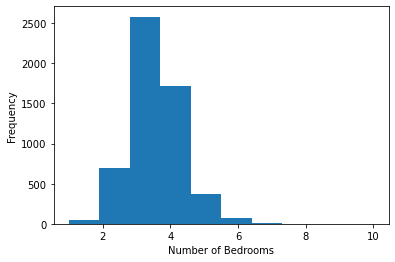

In [218]:
fig, ax = plt.subplots()

ax.hist(df_top_10['bedrooms'])
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

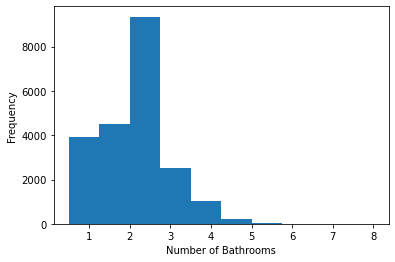

In [242]:
fig, ax = plt.subplots()

ax.hist(df['bathrooms'])
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

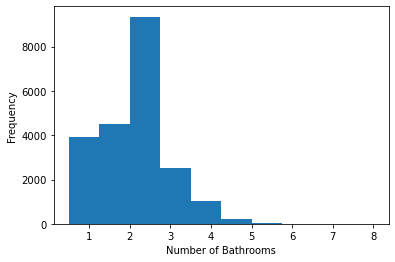

In [241]:
fig, ax = plt.subplots()

ax.hist(df['bathrooms'])
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

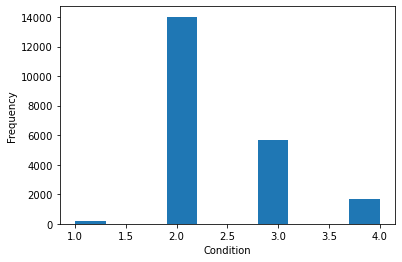

In [243]:
fig, ax = plt.subplots()

ax.hist(df['condition_num'])
ax.set_xlabel('Condition')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

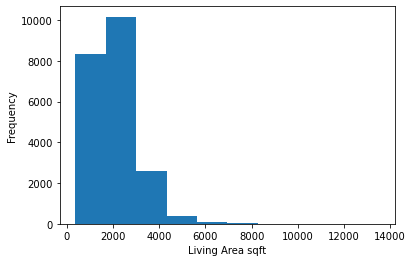

In [244]:
fig, ax = plt.subplots()

ax.hist(df['sqft_living'])
ax.set_xlabel('Living Area sqft')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

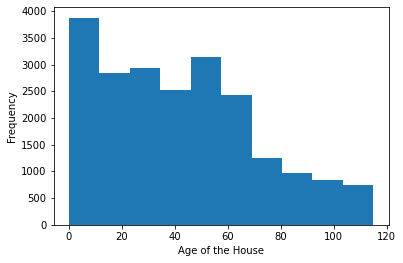

In [245]:
fig, ax = plt.subplots()

ax.hist(df['age'])
ax.set_xlabel('Age of the House')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

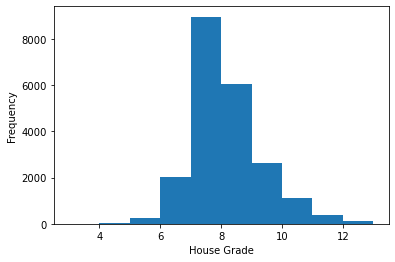

In [246]:
fig, ax = plt.subplots()

ax.hist(df['grade_value'])
ax.set_xlabel('House Grade')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

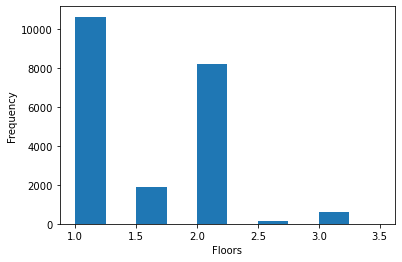

In [248]:
fig, ax = plt.subplots()

ax.hist(df['floors'])
ax.set_xlabel('Floors')
ax.set_ylabel('Frequency')

In [219]:
def r2_calc(zipcode):
    df_zip = df[df['zipcode']==zipcode]
    y = df_zip['price']
    x = df_zip[['sqft_living','sqft_lot','grade_value','bedrooms','bathrooms','floors']]
    X = sm.add_constant(x)
    model = sm.OLS(y,X).fit()
    return f'{round(model.rsquared,4) * 100} %'

In [220]:
r2_calc(98103)

'63.629999999999995 %'

In [221]:
zipcodes = list(df_top_10['zipcode'].value_counts().index)

In [222]:
dict = {}
for i in range(10):
    dict[zipcodes[i]] = r2_calc(zipcodes[i])
    
dict

{98103: '63.629999999999995 %',
 98038: '77.31 %',
 98115: '68.4 %',
 98052: '67.58 %',
 98117: '69.27 %',
 98042: '77.72 %',
 98034: '58.879999999999995 %',
 98118: '68.65 %',
 98023: '69.28 %',
 98006: '68.57 %'}

In [223]:
zipcode = 98023
df_top_10_zip = df_top_10[df_top_10['zipcode']==zipcode]
y = df_top_10_zip['price']
x = df_top_10_zip[['sqft_living','sqft_lot','grade_value','bedrooms','bathrooms','floors']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.19e-122
Time:                        10:27:06   Log-Likelihood:                -6187.7
No. Observations:                 498   AIC:                         1.239e+04
Df Residuals:                     491   BIC:                         1.242e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.527e+04   3.07e+04     -1.475      0.141   -1.06e+05     1.5e+04
sqft_living    87.6771      7.630     11.491      0.000      72.685     102.669
sqft_lot        2.9550      0.344      8.593      0.000       2.279       3.631
grade_value  2.013e+04   4578.925      4.397      0.000    1.11e+04    2.91e+04
bedrooms    -1.563e+04   4884.144     -3.200      0.001   -2.52e+04   -6035.060
bathrooms    2127.9239   7069.307      0.301      0.764   -1.18e+04     1.6e+04
floors       1.775e+04   7225.754      2.457      0.014    3554.492    3.19e+04
==============================================================================
Omnibus:                      453.143   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25287.561
Skew:                           3.658   Prob(JB):                         0.00
Kurtosis:                      37.134   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
def price_calculator():

    y = df_top_10['price']
    x = df_top_10[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
    X = sm.add_constant(x)
    model = sm.OLS(y,X).fit()
    model.summary()

SyntaxError: invalid syntax (<ipython-input-224-8031df355b53>, line 2)

In [281]:
y = df['price']
x = df[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     4649.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:12:37   Log-Likelihood:            -2.9705e+05
No. Observations:               21567   AIC:                         5.941e+05
Df Residuals:                   21559   BIC:                         5.942e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -9.8e+05   1.74e+04    -56.167      0.000   -1.01e+06   -9.46e+05
sqft_living     193.0720      3.463     55.749      0.000     186.284     199.860
grade_value    1.258e+05   2287.036     55.017      0.000    1.21e+05     1.3e+05
bedrooms      -5.279e+04   2253.087    -23.430      0.000   -5.72e+04   -4.84e+04
bathrooms      5.044e+04   3703.510     13.621      0.000    4.32e+04    5.77e+04
floors         1.637e+04   3665.015      4.468      0.000    9190.998    2.36e+04
condition_num  2.126e+04   2713.381      7.837      0.000    1.59e+04    2.66e+04
age            3578.9523     74.219     48.222      0.000    3433.478    3724.427
==============================================================================
Omnibus:                    17335.240   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1220668.898
Skew:                           3.368   Prob(JB):                         0.00
Kurtosis:                      39.235   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
np.random.seed(42)


In [269]:
my_sample = df.sample(1)
my_sample_price = my_sample.iloc[0,2]
my_sample_pt = my_sample[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age',]]

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt

Price of sample: $515000.0


,sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age,zipcode
6796,2980,9,4,2.5,2.0,2,19,98031


In [228]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    '''
    Takes in features & targets from `data` to train a linear regression with a
    random sample `ntimes`. It then returns a list of R2 scores, RMSEs, and the 
    predictions from a provided data point of features `sample_pt`.
    '''
    # To save all of our predictions
    r2 = []
    rmse = []
    # Only return predictions if there is something to predict (sample_pt given)
    point_preds = [] if (sample_pt is not None) else None

    # We'll repeat this little experiment to see how the model does
    for i in range(ntimes):
        # Creating a random sample of data to train on
        df_sample = data.sample(5000, replace=True)
        y = df_sample.price
        X = df_sample.drop('price', axis=1)

        # Our linear regression model about to be trained
        lr = LinearRegression()
        lr.fit(X, y)

        # Making predictions & evaluating on the data we used to train the model
        y_hat = lr.predict(X)
        rmse.append(np.sqrt(mean_squared_error(y, y_hat)))
        r2.append(lr.score(X, y))

        # Making a prediction on the one point the model definitely never saw
        if sample_pt is not None:
            y_hat_pt = lr.predict(sample_pt)
            # Getting just the single point to add into list
            point_preds.append(y_hat_pt[0])
    
    return r2, rmse, point_preds

In [229]:
r2_simple, rmse_simple, pt_preds_simple = train_lr_randomly(
                                                        data=df[['price','sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']], 
                                                        sample_pt=my_sample_pt,
                                                        ntimes=100                            
)

In [392]:
rmse_simple

[210084.79933373054,
 229820.26468570426,
 232384.59412831458,
 264579.5491341066,
 235993.72252456663,
 226773.2267661601,
 241270.0145411711,
 228338.72141219163,
 217208.1314634326,
 232770.01499697712,
 242270.49532255836,
 229102.55541486797,
 245966.0503839397,
 236425.3444326802,
 222486.72810492336,
 229860.72420650048,
 241975.20766606237,
 237899.28178923947,
 221483.54750121647,
 230937.17897502516,
 231969.41558898942,
 233520.87973201624,
 257615.45594812703,
 222725.25107374426,
 226011.43548845575,
 247912.76550021453,
 228613.51109869493,
 224277.04400567102,
 226310.9815064048,
 220956.69316005462,
 226633.63178906371,
 248601.88849889225,
 230236.10662216402,
 235407.45408253645,
 239660.17635569852,
 245351.19792534228,
 235568.30170038267,
 217375.812116749,
 236161.85684059246,
 253377.2941728173,
 245619.58653655188,
 230456.9526630503,
 235308.94275027342,
 232337.53968126315,
 224048.32959000592,
 221026.3835102484,
 233883.2668937957,
 242126.60077653136,
 2480

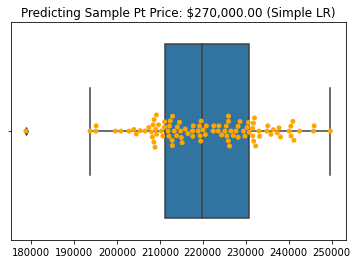

In [231]:
ax = sns.boxplot(x=pt_preds_simple);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

In [394]:

pf = PolynomialFeatures(2)

df_poly = pd.DataFrame(pf.fit_transform(df_pol))
df_poly.index = df.index
df_poly['price'] = df['price']

cols = list(df_poly)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('price')))

df_poly = df_poly.loc[:, cols]

df_poly.head(10)

,price,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
0,221900.0,1.0,221900.0,1180.0,7.0,3.0,1.00,1.0,2.0,60.0,...,1.0000,1.0,2.0,60.0,1.0,2.0,60.0,4.0,120.0,3600.0
1,538000.0,1.0,538000.0,2570.0,7.0,3.0,2.25,2.0,2.0,24.0,...,5.0625,4.5,4.5,54.0,4.0,4.0,48.0,4.0,48.0,576.0
2,180000.0,1.0,180000.0,770.0,6.0,2.0,1.00,1.0,2.0,82.0,...,1.0000,1.0,2.0,82.0,1.0,2.0,82.0,4.0,164.0,6724.0
3,604000.0,1.0,604000.0,1960.0,7.0,4.0,3.00,1.0,4.0,50.0,...,9.0000,3.0,12.0,150.0,1.0,4.0,50.0,16.0,200.0,2500.0
4,510000.0,1.0,510000.0,1680.0,8.0,3.0,2.00,1.0,2.0,28.0,...,4.0000,2.0,4.0,56.0,1.0,2.0,28.0,4.0,56.0,784.0
5,1230000.0,1.0,1230000.0,5420.0,11.0,4.0,4.50,1.0,2.0,14.0,...,20.2500,4.5,9.0,63.0,1.0,2.0,14.0,4.0,28.0,196.0
6,257500.0,1.0,257500.0,1715.0,7.0,3.0,2.25,2.0,2.0,20.0,...,5.0625,4.5,4.5,45.0,4.0,4.0,40.0,4.0,40.0,400.0
7,291850.0,1.0,291850.0,1060.0,7.0,3.0,1.50,1.0,2.0,52.0,...,2.2500,1.5,3.0,78.0,1.0,2.0,52.0,4.0,104.0,2704.0
8,229500.0,1.0,229500.0,1780.0,7.0,3.0,1.00,1.0,2.0,55.0,...,1.0000,1.0,2.0,55.0,1.0,2.0,55.0,4.0,110.0,3025.0
9,323000.0,1.0,323000.0,1890.0,7.0,3.0,2.50,2.0,2.0,12.0,...,6.2500,5.0,5.0,30.0,4.0,4.0,24.0,4.0,24.0,144.0


In [395]:
# Let's make sure we have another sample point to test our models
my_sample_pt_poly = pf.transform(my_sample_pt)

# Show my random sample off
print(f'Price of sample: ${my_sample_price}')
my_sample_pt_poly.shape

Price of sample: $515000.0


(1, 45)

In [396]:
# Run 100 linear regression trainings on some random polynomial features data
# from df_poly and compare it with the random sample point
r2_poly, rmse_poly, pt_preds_poly = train_lr_randomly(
                                                data=df_poly, 
                                                sample_pt=my_sample_pt_poly,
                                                ntimes=100                            
)

/Users/ferityikar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


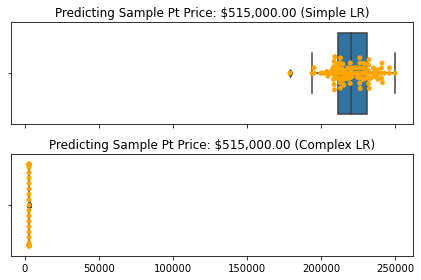

In [397]:
f, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,4));

# Simple model
ax = sns.boxplot(x=pt_preds_simple, ax=ax1);
ax = sns.swarmplot(x=pt_preds_simple, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Simple LR)');

# Complex model
ax = sns.boxplot(x=pt_preds_poly, ax=ax2);
ax = sns.swarmplot(x=pt_preds_poly, color='orange', ax=ax)
ax.set_title(f'Predicting Sample Pt Price: ${my_sample_price:,.2f} (Complex LR)');

# Makes spacing work better
f.tight_layout()

In [398]:
print('How it did on its own training data:')
print(f'\t- simple mean {np.mean(rmse_simple)}')
print(f'\t- complex mean {np.mean(rmse_poly)}')
print('\n')

print('How it did on data it never saw:')
print(f'\t- simple variance {np.std(pt_preds_simple)}')
print(f'\t- complex variance {np.std(pt_preds_poly)}')

How it did on its own training data:
	- simple mean 233749.05667850774
	- complex mean 0.00015515196566043523


How it did on data it never saw:
	- simple variance 13093.715158996485
	- complex variance 15.644121125728775


In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=None,
                                                    random_state=42)

In [411]:
display(X_train.head())
display(X_test.head())

,const,sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age
1213,1.0,2090,8,3,2.50,2.0,2,26
17216,1.0,3260,10,4,2.75,1.0,3,47
6428,1.0,1760,8,5,2.00,1.0,2,56
1088,1.0,1850,8,4,2.00,1.0,3,46
21336,1.0,1460,8,2,2.25,2.0,2,10


,const,sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age
16121,1.0,1600,7,4,2.50,2.0,2,6
4429,1.0,2610,8,4,2.75,1.0,3,28
15152,1.0,3860,12,4,4.00,2.0,3,88
15306,1.0,1450,8,3,1.75,1.0,3,39
6716,1.0,3350,10,4,2.75,2.0,2,16


In [412]:
print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0] == y_test.shape[0])

(16175, 8)
(5392, 8)
True
True


In [413]:
lr = LinearRegression()


In [414]:
lr.fit(X_train, y_train)


LinearRegression()

In [415]:
lr.predict(X_train)

array([ 567589.93121879, 1077853.36911887,  462069.09122066, ...,
        652868.52838093,  866017.24788072, 1219228.46323416])

In [416]:
lr.score(X_train, y_train)


0.6025324289517291

In [424]:
rmse_total = (sum((y_test - lr.predict(X_test))**2)/len(y_test))**.5
rmse_total


236415.6349167124

In [417]:
lr.score(X_test, y_test)


0.5982714078023785

In [431]:
((y_test-lr.predict(X_test))**2).sort_values(ascending=False).cumsum()/sum(((y_test-lr.predict(X_test))**2).sort_values(ascending=False))

9245     0.056577
4407     0.086263
2862     0.102708
18467    0.117694
2083     0.132478
           ...   
9407     1.000000
6205     1.000000
5045     1.000000
6813     1.000000
12496    1.000000
Name: price, Length: 5392, dtype: float64

In [388]:
df_pol = df[['price','sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]

In [389]:
poly_2 = PolynomialFeatures(4)

X_poly = pd.DataFrame(
            poly_2.fit_transform(df_pol.drop('price', axis=1))
                      )

y = df.price
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,1.0,1180.0,7.0,3.0,1.00,1.0,2.0,60.0,1392400.0,8260.0,...,3600.0,8.0,240.0,7200.0,216000.0,16.0,480.0,14400.0,432000.0,12960000.0
1,1.0,2570.0,7.0,3.0,2.25,2.0,2.0,24.0,6604900.0,17990.0,...,2304.0,16.0,192.0,2304.0,27648.0,16.0,192.0,2304.0,27648.0,331776.0
2,1.0,770.0,6.0,2.0,1.00,1.0,2.0,82.0,592900.0,4620.0,...,6724.0,8.0,328.0,13448.0,551368.0,16.0,656.0,26896.0,1102736.0,45212176.0
3,1.0,1960.0,7.0,4.0,3.00,1.0,4.0,50.0,3841600.0,13720.0,...,2500.0,64.0,800.0,10000.0,125000.0,256.0,3200.0,40000.0,500000.0,6250000.0
4,1.0,1680.0,8.0,3.0,2.00,1.0,2.0,28.0,2822400.0,13440.0,...,784.0,8.0,112.0,1568.0,21952.0,16.0,224.0,3136.0,43904.0,614656.0


In [390]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                    test_size=0.2,
                                                    random_state=42)
lr_poly = LinearRegression()

# Always fit on the training set
lr_poly.fit(X_train, y_train)

lr_poly.score(X_train, y_train)

0.7012874936514415

In [391]:
lr_poly.score(X_test, y_test)


-0.38363351943624613

In [252]:
df_test = df[df['price'] < 730000]
df_test = df_test[ (df_test['bedrooms'] == 2) | (df_test['bedrooms'] ==3) ]

In [253]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,month,grade_value,condition_num,view_number,age,waterfront_number
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,-122.257,1340,5650,2014,10,7,2,0.0,60,NaN
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,-122.319,1690,7639,2014,12,7,2,0.0,24,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,-122.233,2720,8062,2015,2,6,2,0.0,82,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,-122.045,1800,7503,2015,2,8,2,0.0,28,0.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,-122.327,2238,6819,2014,6,7,2,0.0,20,0.0


In [309]:
y = df['price']
x = df[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     4649.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:18:12   Log-Likelihood:            -2.9705e+05
No. Observations:               21567   AIC:                         5.941e+05
Df Residuals:                   21559   BIC:                         5.942e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -9.8e+05   1.74e+04    -56.167      0.000   -1.01e+06   -9.46e+05
sqft_living     193.0720      3.463     55.749      0.000     186.284     199.860
grade_value    1.258e+05   2287.036     55.017      0.000    1.21e+05     1.3e+05
bedrooms      -5.279e+04   2253.087    -23.430      0.000   -5.72e+04   -4.84e+04
bathrooms      5.044e+04   3703.510     13.621      0.000    4.32e+04    5.77e+04
floors         1.637e+04   3665.015      4.468      0.000    9190.998    2.36e+04
condition_num  2.126e+04   2713.381      7.837      0.000    1.59e+04    2.66e+04
age            3578.9523     74.219     48.222      0.000    3433.478    3724.427
==============================================================================
Omnibus:                    17335.240   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1220668.898
Skew:                           3.368   Prob(JB):                         0.00
Kurtosis:                      39.235   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [319]:
def price_calculator(data=df):
    sqft_living = int(input('How many SQFT is the house?'))
    grade_value = int(input('What grade is the house? From 4-Low to 13-Mansion'))
    bedrooms = int(input('How many bedrooms does the house have?'))
    bathrooms = float(input('How many bathrooms does the house have?'))
    floors = int(input('How many floors does the house have?'))
    condition_num = int(input('What condition is the house in? 1-Fair to 4-Very Good'))
    age = int(input('How many years passed after last renovation? If never renovated put age of the house. '))

    y = data['price']
    x = data[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
    X = sm.add_constant(x)
    model = sm.OLS(y,X).fit()
    coef = model.params
    price = coef['const'] + sqft_living*coef['sqft_living'] + grade_value*coef['grade_value'] + bedrooms*coef['bedrooms'] + bathrooms*coef['bathrooms'] + floors*coef['floors'] + condition_num*coef['condition_num'] + age*coef['age']
    price = round(round(price/1000)*1000)
    #print(f'For given specifications expected price range for a house would be USD {price-50000} - {price+50000}. ')
    return price-50000, price+50000

In [320]:
price_calculator()

For given specifications expected price range for a house would be USD 417000.0 - 517000.0. 


(417000.0, 517000.0)

In [355]:
def price_calculator_partial(sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age,data=df):
    y = data['price_log']
    x = data[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
    X = sm.add_constant(x)
    model = sm.OLS(y,X).fit()
    coef = model.params
    price = coef['const'] + sqft_living*coef['sqft_living'] + grade_value*coef['grade_value'] + bedrooms*coef['bedrooms'] + bathrooms*coef['bathrooms'] + floors*coef['floors'] + condition_num*coef['condition_num'] + age*coef['age']
    price = int(round(round(price/1000)*1000,2))
    #print(f'For given specifications expected price range for a house would be USD {price-50000} - {price+50000}. ')
    return price

In [356]:
price_calculator_partial(2500,6,3,2,1,3,10,data=df)

316000

In [359]:
def price_calculator_zipcode(zipcode, data=df):
    sqft_living = int(input('How many SQFT is the house?'))
    grade_value = int(input('What grade is the house? From 1-Fair to 7-Excellent'))+4
    bedrooms = int(input('How many bedrooms does the house have?'))
    bathrooms = float(input('How many bathrooms does the house have?'))
    floors = int(input('How many floors does the house have?'))
    condition_num = int(input('What condition is the house in? 1-Fair to 4-Very Good'))
    age = int(input('How many years passed after last renovation? If never renovated put age of the house. '))   

    data_zipcode = data[data['zipcode']==zipcode]
    price_area = price_calculator_partial(sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age,data)
    price_zipcode = price_calculator_partial(sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age,data_zipcode)
    if price_zipcode > (730000/1.1):
        print(f'This zipcode is too expensive for given specifications, expected price is {price_zipcode}')
    else:
        print(f'For given specifications expected price range for a house in {zipcode} zipcode would be  ${int(price_zipcode-price_zipcode*.1)} - {int(price_zipcode+price_zipcode*.1)}. ')
        print(f'For given specifications expected price range for a house in King County would be ${int(price_area-price_area*.1)} - {int(price_area+price_area*.1)}. ')
        if price_area < price_zipcode:
            print(f'This zipcode is overpriced with average ${price_zipcode} compared to King County market  average of ${price_area}')
        elif price_area > price_zipcode:
            print(f'This zipcode is underpriced with average ${price_zipcode} compared to King County market  average of ${price_area}')
        else:
            print('This zipcode is similar with average ${price_zipcode} compared to King County market.')
        return price_zipcode-price_zipcode*.1, price_zipcode+price_zipcode*.1

In [403]:
price_calculator_zipcode(98023)

For given specifications expected price range for a house in 98023 zipcode would be  $306000 - 374000. 
For given specifications expected price range for a house in King County would be $551700 - 674300. 
This zipcode is underpriced with average $340000 compared to King County market  average of $613000


(306000.0, 374000.0)

In [402]:
zipcodes_list = list(set(df['zipcode']))
len(zipcodes_list)

70

In [ ]:
def price_calculator_all_zipcodes(data=df):
    sqft_living = int(input('How many SQFT is the house?'))
    grade_value = int(input('What grade is the house? From 1-Fair to 7-Excellent'))+4
    bedrooms = int(input('How many bedrooms does the house have?'))
    bathrooms = float(input('How many bathrooms does the house have?'))
    floors = int(input('How many floors does the house have?'))
    condition_num = int(input('What condition is the house in? 1-Fair to 4-Very Good'))
    age = int(input('How many years passed after last renovation? If never renovated put age of the house. '))
    zipcodes_list = list(set(data['zipcode']))
    zc_price_expectations = {}
    for zc in zipcodes_list:
        zc_price_expectations[zc] = price_calculator_partial(sqft_living,grade_value,bedrooms,bathrooms,floors,condition_num,age,data_zipcode)
    return zc_price_expectations

In [361]:
y = df['price']
x = df[['sqft_living','grade_value','bedrooms','bathrooms','floors','condition_num','age']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     4649.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:34:53   Log-Likelihood:            -2.9705e+05
No. Observations:               21567   AIC:                         5.941e+05
Df Residuals:                   21559   BIC:                         5.942e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -9.8e+05   1.74e+04    -56.167      0.000   -1.01e+06   -9.46e+05
sqft_living     193.0720      3.463     55.749      0.000     186.284     199.860
grade_value    1.258e+05   2287.036     55.017      0.000    1.21e+05     1.3e+05
bedrooms      -5.279e+04   2253.087    -23.430      0.000   -5.72e+04   -4.84e+04
bathrooms      5.044e+04   3703.510     13.621      0.000    4.32e+04    5.77e+04
floors         1.637e+04   3665.015      4.468      0.000    9190.998    2.36e+04
condition_num  2.126e+04   2713.381      7.837      0.000    1.59e+04    2.66e+04
age            3578.9523     74.219     48.222      0.000    3433.478    3724.427
==============================================================================
Omnibus:                    17335.240   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1220668.898
Skew:                           3.368   Prob(JB):                         0.00
Kurtosis:                      39.235   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
    sqft_living = input('How many SQFT is the house?')
    grade_value = input('What grade is the house? From 4-Low to 13-Mansion')
    bedrooms = input('How many bedrooms foes the house have?')
    bathrooms = input('How many bathrooms does the house have?')
    floors = input('How many floors does the house have?')
    condition_num = input('What condition is the house in? 1-Fair to 4-Very Good')
    age = input('How many years passed after last renovation? If never renovated put age of the house. ')